# Image Analysis

This notebook shows some simple examples of basic image analysis techniques.

Although the code should be roughly self-explanatory, please read along with these slides (INSERT SLIDES) for a better grasp of the concepts.


# Introduction

Image analysis is an umbrella term for various methods and tools for manipulating and extracting information from images. There are fairly sophisticated algorithms like CNNs which would be difficult to cover in an introduction, but even these techniques build on some simple tools, such as segmentation and feature detection. I'll cover some of the basic tools in hopes that you'll be able to tackle more advanced techniques with the right vocabulary.


# Topics

- Structure of image data
- Segmentation
  - Thresholding
  - Clustering
  - Edges...
- Feature detection
  - Edge detection
  - Corner detection
  - Ridge detection


### Structure of image data

If you don't have Pillow yet...

    ! pip install --user Pillow

Height, width, and # of channels:  (649, 960, 3)


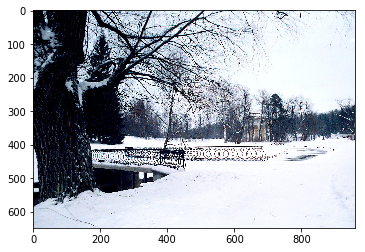

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('Pavlovsk_bridge.png')
img_array = np.asarray(img).copy()      # Convert image object to numpy array so we can inspect the data

# PIL offers some basic image analysis tools, but I'll use numpy for the examples here
# because you'll probably have to do most heavy lifting through numpy anyway

print "Height, width, and # of channels: ", img_array.shape

plt.imshow(img_array)
plt.show()

### Thresholding


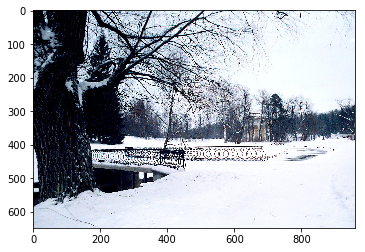

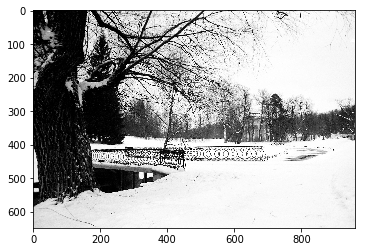

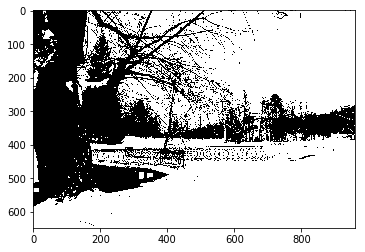

In [5]:
img = Image.open('Pavlovsk_bridge.png')


# Below is how you'd do this with Pillow

if False:
    img.show()  # Warning: displays image by opening your OS's default image viewing software
    img_gray = img.convert('L')     # Converts to grayscale using the Luma transform 
                                    # (we just want to segment on how "bright" the pixels are)
                                    # https://en.wikipedia.org/wiki/Grayscale#Luma_coding_in_video_systems
    img_thresh = img_gray.point(lambda x: 0 if x<128 else 255, '1')
                                    # Segments image using threshold value of 128
    img_thresh.show()
    
    
# Now the numpy way

img_arr = np.asarray(img).copy()
plt.imshow(img_arr)
plt.show()

img_gray = np.mean( img_arr, 2)     # Convert to grayscale by taking the average of RGB values
plt.imshow(img_gray, cmap='gray')
plt.show()

# Pixel range is 0...255, 256/2 = 128
img_thresh = img_gray
img_thresh[img_gray < 128] = 0    # Black
img_thresh[img_gray >= 128] = 255 # White

plt.imshow(img_thresh, cmap='gray')
plt.show()


# Adapted from https://stackoverflow.com/questions/18777873/convert-rgb-to-black-or-white